In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('AMES_TRAIN.csv')
test = pd.read_csv('AMES_TEST_SFAM.csv')
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]
train['qualityindex'] = (train.overallqual*train.overallcond)
train['totalsqftcalc'] = (train.bsmtfinsf1+train.bsmtfinsf2+train.grlivarea)
train['pricesqfoot'] = (train['saleprice']/train['totalsqftcalc'])
test['qualityindex'] = (test.overallqual*test.overallcond)
test['totalsqftcalc'] = (test.bsmtfinsf1+test.bsmtfinsf2+test.grlivarea)
test['pricesqfoot'] = (test['saleprice']/test['totalsqftcalc'])
train=train.replace({'totalsqftcalc': {np.NaN : 10000}})
train=train.replace({'lotarea': {np.NaN : 10000}})
train=train.replace({'lotfrontage': {np.NaN : 10000}})
test=test.replace({'totalsqftcalc': {np.NaN : 10000}})
test=test.replace({'lotarea': {np.NaN : 10000}})
test=test.replace({'lotfrontage': {np.NaN : 10000}})

In [3]:
test['Neighborhood_Group'] = np.nan
#added due to later work with Neighborhood groupings

In [4]:
#print(train.head())
#print(test.head())
#print(train['pricesqfoot'])
#list(train)

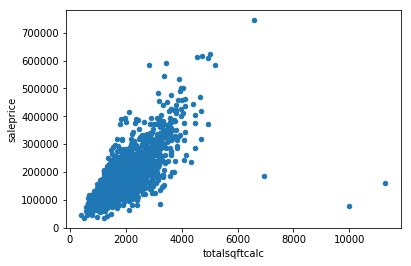

In [5]:
train.plot.scatter(y='saleprice', x='totalsqftcalc') 
#This lets me see some outliars that could be distorting the data.

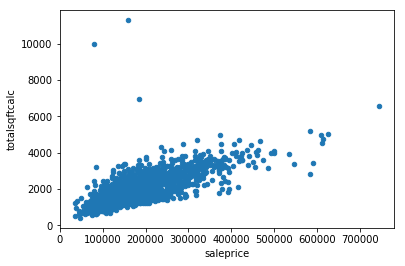

In [6]:
train.plot.scatter(y='totalsqftcalc', x='saleprice') 

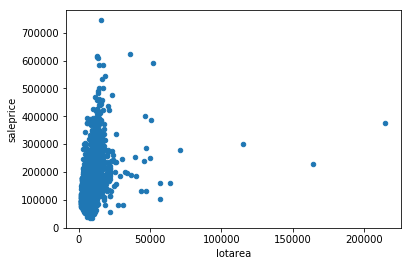

In [7]:
train.plot.scatter(y='saleprice', x='lotarea') 

In [8]:
#train.plot.bar(y='saleprice', x='zoning') 

In [9]:
train = train[train['totalsqftcalc'] < 6000]
train = train[train['salecondition'] == 'Normal']
train = train[train['saleprice'] <= 500000]
train = train[train['lotarea'] <= 25000]
train = train[train['zoning'] != 'I']
train = train[train['zoning'] != 'C']
train = train[train['zoning'] != 'A']

In [10]:
X = train[['saleprice','qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
X1 = train[['qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
corr = X[X.columns].corr()
corr

,saleprice,qualityindex,totalsqftcalc,yearbuilt,lotarea,lotfrontage
saleprice,1.000000,0.540376,0.792214,0.547300,0.395148,0.084242
qualityindex,0.540376,1.000000,0.346798,0.092073,0.119472,0.048181
totalsqftcalc,0.792214,0.346798,1.000000,0.358158,0.376621,0.125655
yearbuilt,0.547300,0.092073,0.358158,1.000000,0.056350,0.115568
lotarea,0.395148,0.119472,0.376621,0.056350,1.000000,0.156123
lotfrontage,0.084242,0.048181,0.125655,0.115568,0.156123,1.000000


In [11]:
Y = train[['saleprice']].copy()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_top_3 = SelectKBest(score_func=chi2, k = 3)
fit = select_top_3.fit(X1,Y)
features = fit.transform(X1)
features[0:5] 

array([[ 1788., 11838., 10000.],
       [ 1837.,  8304.,    70.],
       [ 1048.,  6380.,    58.],
       [ 2409., 14803., 10000.],
       [ 2035., 11375.,    91.]])

In [12]:
model1 = smf.ols(formula='Y ~ qualityindex+totalsqftcalc+C(lotconfig)+C(neighborhood)+C(housestyle)+yearbuilt+C(roofstyle)+C(heating)', data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     201.2
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:46:33   Log-Likelihood:                -18951.
No. Observations:                1645   AIC:                         3.800e+04
Df Residuals:                    1594   BIC:                         3.828e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1.026e+06   9.79e+04    -10.482      0.000   -1.22e+06   -8.34e+05
C(lotconfig)[T.CulDSac]      435.8677   3095.042      0.141      0.888   -5634.914    6506.649
C(lotconfig)[T.FR2]        -1.002e+04   4057.507     -2.469      0.014    -1.8e+04   -2057.607
C(lotconfig)[T.FR3]        -1.391e+04   8965.934     -1.551      0.121   -3.15e+04    3677.182
C(lotconfig)[T.Inside]      -453.9834   1681.123     -0.270      0.787   -3751.428    2843.461
C(neighborhood)[T.Blueste]  -3.03e+04   1.26e+04     -2.408      0.016    -5.5e+04   -5621.037
C(neighborhood)[T.BrDale]  -4.286e+04   1.05e+04     -4.095      0.000   -6.34e+04   -2.23e+04
C(neighborhood)[T.BrkSide] -8114.4966   9411.701     -0.862      0.389   -2.66e+04    1.03e+04
C(neighborhood)[T.ClearCr]  -438.9187   1.02e+04     -0.043      0.966   -2.05e+04    1.96e+04
C(neighborhood)[T.CollgCr] -3443.3782   8539.054     -0.403      0.687   -2.02e+04    1.33e+04
C(neighborhood)[T.Crawfor]  1.187e+04   9306.905      1.275      0.202   -6388.687    3.01e+04
C(neighborhood)[T.Edwards] -2.163e+04   8881.845     -2.436      0.015   -3.91e+04   -4210.693
C(neighborhood)[T.Gilbert] -3300.1431   8804.413     -0.375      0.708   -2.06e+04     1.4e+04
C(neighborhood)[T.Greens]  -1.901e+04   1.32e+04     -1.440      0.150   -4.49e+04    6879.294
C(neighborhood)[T.GrnHill]  9.739e+04   2.61e+04      3.727      0.000    4.61e+04    1.49e+05
C(neighborhood)[T.IDOTRR]  -1.361e+04   9846.436     -1.382      0.167   -3.29e+04    5704.256
C(neighborhood)[T.MeadowV] -4.144e+04   1.01e+04     -4.115      0.000   -6.12e+04   -2.17e+04
C(neighborhood)[T.Mitchel] -1.666e+04   8951.434     -1.861      0.063   -3.42e+04     898.445
C(neighborhood)[T.NAmes]   -2.179e+04   8687.478     -2.508      0.012   -3.88e+04   -4750.779
C(neighborhood)[T.NPkVill] -3.148e+04   1.06e+04     -2.981      0.003   -5.22e+04   -1.08e+04
C(neighborhood)[T.NWAmes]  -2.043e+04   8918.962     -2.291      0.022   -3.79e+04   -2937.467
C(neighborhood)[T.NoRidge]   3.63e+04   9302.672      3.902      0.000    1.81e+04    5.45e+04
C(neighborhood)[T.NridgHt]  4.874e+04   8895.376      5.479      0.000    3.13e+04    6.62e+04
C(neighborhood)[T.OldTown] -1.398e+04   9265.661     -1.509      0.132   -3.22e+04    4194.131
C(neighborhood)[T.SWISU]   -2.276e+04   1.06e+04     -2.151      0.032   -4.35e+04   -2004.547
C(neighborhood)[T.Sawyer]  -2.301e+04   8927.761     -2.578      0.010   -4.05e+04   -5502.538
C(neighborhood)[T.SawyerW] -1.312e+04   8818.868     -1.487      0.137   -3.04e+04    4182.578
C(neighborhood)[T.Somerst]  1.385e+04   8780.162      1.578      0.115   -3369.733    3.11e+04
C(neighborhood)[T.StoneBr]  2.532e+04   9762.602      2.594      0.010    6174.770    4.45e+04
C(neighborhood)[T.Timber]   1.247e+04   926

In [13]:
predictions_1 = model1.fittedvalues
predictions_1.head()

0    206732.475536
1    168705.634681
2    101680.037557
3    175977.613500
4    145861.699264
dtype: float64

In [14]:
test_predictions_1 = model1.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

,index,p_saleprice
0,1,59557.458448
1,4,230538.832336
2,7,217543.823938
3,11,238081.659313
4,13,168824.829897


In [62]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW2_MODEL_1_NBGROUP.csv')

In [63]:
neighborhood_predictions = model1.fittedvalues
neighborhood_predictions.head()
tr = {'p_saleprice': neighborhood_predictions}
df1 = train[['index','saleprice','neighborhood','totalsqftcalc']]
df2=pd.DataFrame(data=tr)
n_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])

n_file['residual'] = (n_file.saleprice-n_file.p_saleprice)
n_file['actual_ppsf'] = (n_file.saleprice/n_file.totalsqftcalc)
n_file['predicted_ppsf'] = (n_file.p_saleprice/n_file.totalsqftcalc)
compare = n_file[['neighborhood','actual_ppsf','predicted_ppsf']]
compare.head()

,neighborhood,actual_ppsf,predicted_ppsf
0,CollgCr,132.270694,115.622190
1,SawyerW,101.796407,91.837580
2,BrkSide,107.824427,97.022937
3,NWAmes,78.870901,73.050068
4,Sawyer,73.710074,71.676511


In [64]:
group1 = ['GrnHill', 'Blmngtn', 'NridgHt','Somerst','StoneBr','Timber','Gilbert','CollgCr','NoRidge']
group2 = ['Crawfor','Blueste','SawyerW','Greens','BrkSide','Veenker','Mitchel','IDOTRR','OldTown']
group3 = ['ClearCr','NWAmes','NPkVill','NAmes','Sawyer','Edwards','BrDale','SWISU','MeadowV']
c_2 = compare.copy()
#c_2['Neighborhood_Group'] = c_2['neighborhood'].copy()
#c_2['Neighborhood_Group'] = c_2['neighborhood'].isin(group1).astype('int64')
#c_2['Neighborhood_Group'] = c_2['neighborhood'].isin(group2).astype('int64',copy=False)
#c_2.loc[c_2.Neighborhood_Group == 'CollgCr'] = 1
#c_2
conditions = [
    (c_2['neighborhood'].isin(group1)),
    (c_2['neighborhood'].isin(group2)),
    (c_2['neighborhood'].isin(group3))]
choices = ['1', '2', '3']
c_2['Neighborhood_Group'] = np.select(conditions, choices, default='NA')
c_2

,neighborhood,actual_ppsf,predicted_ppsf,Neighborhood_Group
0,CollgCr,132.270694,115.622190,1
1,SawyerW,101.796407,91.837580,2
2,BrkSide,107.824427,97.022937,2
3,NWAmes,78.870901,73.050068,3
4,Sawyer,73.710074,71.676511,3
5,BrkSide,75.740944,80.070149,2
6,OldTown,50.644567,35.347430,2
9,NPkVill,70.877531,72.075547,3
10,Mitchel,88.983051,94.931310,2
11,BrkSide,68.508287,84.048221,2


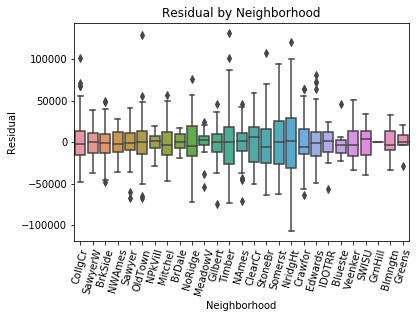

In [66]:
import seaborn as sns
ax = sns.boxplot(x="neighborhood", y="residual", data=n_file)
ax.set_title("Residual by Neighborhood")
ax.set_ylabel("Residual")
ax.set_xlabel("Neighborhood")
plt.xticks(rotation=75)
plt.show()

In [67]:
grouping = c_2[['neighborhood','actual_ppsf','predicted_ppsf','Neighborhood_Group']].groupby('neighborhood').mean()
grouping_sorted = grouping.sort_values(by=['actual_ppsf'], ascending=[False])
grouping_sorted
#neighborhoods sorted by actual ppsf

,actual_ppsf,predicted_ppsf
neighborhood,,
GrnHill,123.318386,123.318386
Blmngtn,118.892612,117.839159
NridgHt,116.384053,119.373685
Somerst,110.542232,111.702139
StoneBr,103.866523,105.737218
Timber,103.230292,103.698200
Gilbert,101.491760,100.569597
CollgCr,99.736694,99.986461
NoRidge,97.265357,97.242276


In [68]:
grouping_sorted_1 = grouping_sorted.reset_index()

In [69]:
grouping_sorted_1.iloc[1:]

,neighborhood,actual_ppsf,predicted_ppsf
1,Blmngtn,118.892612,117.839159
2,NridgHt,116.384053,119.373685
3,Somerst,110.542232,111.702139
4,StoneBr,103.866523,105.737218
5,Timber,103.230292,103.698200
6,Gilbert,101.491760,100.569597
7,CollgCr,99.736694,99.986461
8,NoRidge,97.265357,97.242276
9,Crawfor,96.726724,96.512449
10,Blueste,95.722814,95.435617


In [71]:
group1 = ['GrnHill', 'Blmngtn', 'NridgHt','Somerst','StoneBr','Timber','Gilbert','CollgCr','NoRidge']
group2 = ['Crawfor','Blueste','SawyerW','Greens','BrkSide','Veenker','Mitchel','IDOTRR','OldTown']
group3 = ['ClearCr','NWAmes','NPkVill','NAmes','Sawyer','Edwards','BrDale','SWISU','MeadowV']
conditions = [
    (grouping_sorted_1['neighborhood'].isin(group1)),
    (grouping_sorted_1['neighborhood'].isin(group2)),
    (grouping_sorted_1['neighborhood'].isin(group3))]
choices = ['1', '2', '3']
grouping_sorted_1['Neighborhood_Group'] = np.select(conditions, choices, default='NA')
print(grouping_sorted_1)

   neighborhood  actual_ppsf  predicted_ppsf Neighborhood_Group
0       GrnHill   123.318386      123.318386                  1
1       Blmngtn   118.892612      117.839159                  1
2       NridgHt   116.384053      119.373685                  1
3       Somerst   110.542232      111.702139                  1
4       StoneBr   103.866523      105.737218                  1
5        Timber   103.230292      103.698200                  1
6       Gilbert   101.491760      100.569597                  1
7       CollgCr    99.736694       99.986461                  1
8       NoRidge    97.265357       97.242276                  1
9       Crawfor    96.726724       96.512449                  2
10      Blueste    95.722814       95.435617                  2
11      SawyerW    92.704506       92.312512                  2
12       Greens    91.696116       91.476015                  2
13      BrkSide    89.799890       90.008079                  2
14      Veenker    88.186158       88.50

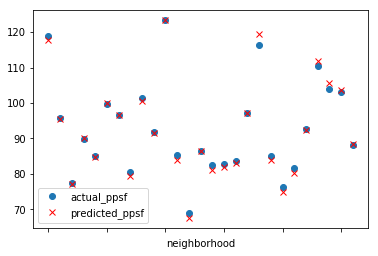

In [72]:
grouping.plot(style=['o','rx'])
# plotted actual vs. predicted against each other to see how close the dots would meet based on mean ppsf.

In [73]:
model3_neighborhoods = smf.ols(formula='Y ~ Neighborhood_Group', data=c_2).fit()
print(model3_neighborhoods.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     374.7
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          8.74e-135
Time:                        01:51:37   Log-Likelihood:                -20278.
No. Observations:                1645   AIC:                         4.056e+04
Df Residuals:                    1642   BIC:                         4.058e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

In [45]:
test_predictions_1 = model3_neighborhoods.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
#Strouse_TestPredictions_1.head()

In [44]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW2_model_3_scored.csv')

In [ ]:
#dir(model2)

In [ ]:
#y = np.array(train['saleprice'])
#X = train[['qualityindex','totalsqftcalc','yearbuilt','yearremodel','wooddecksf','openporchsf' ]].copy()
#X.head()
#model = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=3) # will need to convert y to an array
#results = model.fit(X,y)
#scores are the F values for each variable, bigger is better
#results.scores

In [ ]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(train, test_size = 0.3)